In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('sales_data.csv')

In [5]:
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,12/31/2017,5/31/2018,6/14/2018,6/19/2018,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,12/31/2017,5/31/2018,6/22/2018,7/2/2018,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,12/31/2017,5/31/2018,6/21/2018,7/1/2018,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,12/31/2017,5/31/2018,6/2/2018,6/7/2018,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,4/10/2018,5/31/2018,6/16/2018,6/26/2018,USD,22,49,111,26,8,0.100,1822.4,1476.144


In [6]:
#understand the data types
df.dtypes

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity        int64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
dtype: object

In [7]:
df['Order Quantity']=df['Order Quantity'].astype('float64')

In [8]:
df.dtypes

OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity      float64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
dtype: object

In [10]:
#Find out each customer's rfm value
#Recency
 # I will base the analysis on a day of choice, lets say: 1st Jan 2022
    
day = '2022-01-01'
day= pd.to_datetime(day)
df['OrderDate']= pd.to_datetime(df['OrderDate'])

recency = df.groupby(["_CustomerID"]).agg({"OrderDate": lambda x:((day-x.max()).days)})
recency.head(10)

,OrderDate
_CustomerID,
1,374
2,374
3,375
4,370
5,395
6,369
7,368
8,370
9,373


In [11]:
# calculate the frequency of purchase of the customers
# we would want the model to drop every duplicate value, the primary identifier being OrderNumber

freq = df.drop_duplicates(subset="OrderNumber").groupby(["_CustomerID"])[["OrderNumber"]].count()

In [12]:
freq.head(10)

,OrderNumber
_CustomerID,
1,152
2,135
3,181
4,167
5,159
6,143
7,153
8,142
9,171


In [13]:
# monetary value that the customer brings to the company.
df['TotalProfit'] = df['Order Quantity'] * (df['Unit Price'] - (df['Unit Cost'] + df['Discount Applied']))

In [14]:
money = df.groupby(["_CustomerID"])[['TotalProfit']].sum()

In [17]:
money.head(10)

,TotalProfit
_CustomerID,
1,483123.679
2,494281.177
3,669832.444
4,728005.258
5,628622.360
6,575268.164
7,569447.905
8,518895.424
9,712180.967


In [32]:
RFM = pd.concat([recency, freq, money], axis=1)

In [29]:
RFM.head(10)

,Recency,Frequency,Monetary Value
_CustomerID,,,
1,374,152,483123.679
2,374,135,494281.177
3,375,181,669832.444
4,370,167,728005.258
5,395,159,628622.360
6,369,143,575268.164
7,368,153,569447.905
8,370,142,518895.424
9,373,171,712180.967


In [31]:
# change the column names

recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["MonetaryV"]

In [33]:
RFM.head(10)

,Recency,Frequency,MonetaryV
_CustomerID,,,
1,374,152,483123.679
2,374,135,494281.177
3,375,181,669832.444
4,370,167,728005.258
5,395,159,628622.360
6,369,143,575268.164
7,368,153,569447.905
8,370,142,518895.424
9,373,171,712180.967


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

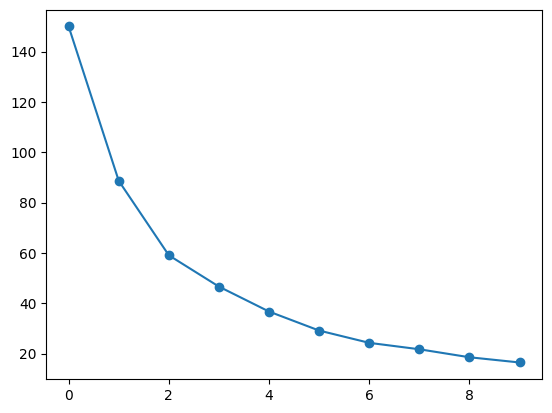

In [38]:
from sklearn.cluster import KMeans

inertia =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    
plt.plot(inertia, marker="o")

In [46]:
kmeans=KMeans(n_clusters=3, n_init=10)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_ + 1)

In [48]:
RFM.head(5)

,Recency,Frequency,MonetaryV,Clusters
_CustomerID,,,,
1,374,152,483123.679,3
2,374,135,494281.177,3
3,375,181,669832.444,2
4,370,167,728005.258,2
5,395,159,628622.360,1


In [53]:
group = RFM.groupby(["Clusters"])[["Recency","Frequency","MonetaryV"]].mean()
group

,Recency,Frequency,MonetaryV
Clusters,,,
1,386.000000,157.75000,610621.006000
2,371.047619,172.47619,687933.731286
3,370.760000,149.52000,559258.285160


In [54]:
def func(row):
    if row["Clusters"] == 1:
        return 'Average Cx'
    elif row["Clusters"] == 2:
        return 'Best Cx'
    else:
        return 'Poor Cx'

In [55]:
RFM["Conditions"]=RFM.apply(func, axis=1)

In [56]:
RFM

,Recency,Frequency,MonetaryV,Clusters,Conditions
_CustomerID,,,,,
1,374,152,483123.679,3,Poor Cx
2,374,135,494281.177,3,Poor Cx
3,375,181,669832.444,2,Best Cx
4,370,167,728005.258,2,Best Cx
5,395,159,628622.360,1,Average Cx
6,369,143,575268.164,3,Poor Cx
7,368,153,569447.905,3,Poor Cx
8,370,142,518895.424,3,Poor Cx
9,373,171,712180.967,2,Best Cx


In [57]:
# checking the spread
result = RFM["Conditions"].value_counts()

In [58]:
result

Conditions
Poor Cx       25
Best Cx       21
Average Cx     4
Name: count, dtype: int64